**Name: Christ-Brian Amedjonekou**  
**Date: 1/30/2019**  
**MAT 4880-D692 (Math Modeling II) Whale Problem**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Section 4.2 - Dynamical Systems

* Refer to [Whale-Problem-2](https://nbviewer.jupyter.org/github/deaththeberry/ML-AI-HKG_Portfolio/blob/master/Labs/MAT%204880-D692%20%28Math%20Modeling%20II%29/MAT%204880-D692%20%28Math%20Modeling%20II%29%20Whale%20Problem%202.ipynb) for the theory behind this problem. 

* We do, however, add another term called the Harvesting Term; This is shown below:

### Step 1: List your variables and Assumptions



## Whale Problem w/ Harvesting

**Variables**

$B = \text{number of blue whales}$  
$F = \text{number of finn whales}$  
$g_B = \text{growth rate for blue whales}$  
$g_F = \text{growth rate for finn whales}$  
$c_B = \text{competition term for blue whales}$  
$c_F = \text{competition term for finn whales}$  
$H_B = \text{harvesting term for blue whales}$  
$H_F = \text{harvesting term for fin whales}$

**Assumptions**

$g_B = 0.05B\Big(1 - \dfrac{B}{150000}\Big)$  

$g_F = 0.08F\Big(1 - \dfrac{F}{400000}\Big)$  

$c_B = c_F = \alpha BF; \text{ where } \alpha = 10^{-8}$

$h_B = qEB; \text{ where } q = 10^{-5}$  

$h_F = qEF; \text{ where } q = 10^{-5}$  

$\frac{dB}{dt} = g_B - c_B - h_B$

$\frac{dF}{dt} = g_F - c_F - h_F$

$B, F \geq 0$

**Objective**

$\text{What values of } E \text{ allow for coexistance}$

### Step 2: Select the modeling approach

* We'll model it as a dynamical system. This dynamical system consists of two state variables: **B, F.**
* The state space is shown below: $$S = \{(B, F): B \geq 0,F \geq 0\}$$ It also consists of a system of two differential equations.

$$\cfrac{dB}{dt} = r_1*B\Big(1−\cfrac{B}{K_1}\Big) − \alpha_1BF - qEB$$

$$\cfrac{dF}{dt} = r_2*F\Big(1−\cfrac{F}{K_2}\Big) − \alpha_1BF - qEF$$


### Step 3: Formulate the model

* The formulated model is shown below: $r_1 = 0.05; r_2 = 0.08 ; K_1 = 150000; K_2 = 400000; \alpha_1 = \alpha_2 =10^{−8}; q = 10^{-5}$

$$\cfrac{dB}{dt} = 0.05*B\Big(1−\cfrac{B}{150000}\Big) − 10^{−8}BF - 10^{−5}EB$$

$$\cfrac{dF}{dt} = 0.08*F\Big(1−\cfrac{F}{400000}\Big) − 10^{−8}BF - 10^{−5}EF$$

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd

### Variables

In [2]:
B,F,E = sp.symbols('B F E')
g_B, g_F = 0.05*B*(1-B/150000), 0.08*F*(1-F/400000)
c_B, c_F = m.pow(10,-8)*B*F, m.pow(10,-8)*B*F
h_B, h_F = m.pow(10,-5)*E*B, m.pow(10,-5)*E*F 
dBdt, dFdt = g_B - c_B - h_B, g_F - c_F - h_F

### Step 4: Solve the model

* Shown Below:

$$\cfrac{dB}{dt} = 0.05*B\Big(1−\cfrac{B}{150000}\Big) − 10^{−8}BF - 10^{−5}EB = 0$$

$$\cfrac{dF}{dt} = 0.08*F\Big(1−\cfrac{F}{400000}\Big) − 10^{−8}BF - 10^{−5}EF = 0$$

### Equillibrium Points

In [3]:
# init_printing() displays LaTeX version of outputs; 'quiet= True' stops 
# init_printing from printing messages regarding its status

sp.init_printing()

# Solution to the system (Equillibrium Points)

solve([dBdt, dFdt], B, F)

### Step 5: Answer the Question

**Finding the minimum value for Harvesting**

* Our model shows that $E$ must be less than 4842 boat-days so that both whale populations can coexist.

In [4]:
sol = solve([dBdt, dFdt], B, F)
eqB = sol[3][0]
solve(eqB >= 0, E)

In [5]:
eqF = sol[3][1]
solve(eqF >= 0, E)
#solve(sp.Eq(eqF, 70000), E)

### Nullclines Solutions

In [6]:
solve(dBdt, B)[0]

In [7]:
solve(dBdt, B)[1]

In [8]:
solve(dFdt, F)[0]

In [9]:
solve(dFdt, F)[1]

### Functions

In [10]:
def dB_dt(blue, fin, boats):
    """Function that calculates the rate of change for blue whales in the system.
    A differential equation. It takes two inputs."""
    growth_Blue = 0.05*blue*(1-blue/150000)
    competition_Blue = m.pow(10,-8)*blue*fin
    harvesting_Blue =  m.pow(10,-5)*boats*blue
    dBxdt = growth_Blue - competition_Blue - harvesting_Blue
    return dBxdt
    
    
def dF_dt(blue, fin, boats):
    growth_Fin = 0.08*fin*(1-fin/400000)
    competition_Fin = m.pow(10,-8)*blue*fin
    harvesting_Fin =  m.pow(10,-5)*boats*fin
    dFxdt = growth_Fin - competition_Fin - harvesting_Fin
    return dFxdt

### Plotting Vector Field

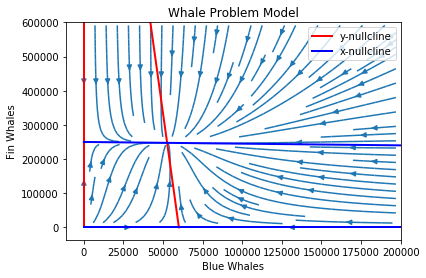

In [11]:
%matplotlib inline
#----------------------------------------------------------------------------------------
# Creates the superimposed plot for stream plot of the model, as well as dBdt = dFdt = 0.
#----------------------------------------------------------------------------------------

# Part 1: Creates the length of the 'X' and 'Y' Axis 
x, y = np.linspace(0, 200000), np.linspace(0, 600000)
X, Y = np.meshgrid(x, y)

# Part 2: Equations of the nullclines
b, f, e = x, y, 3000
B1, F1, B2, F2 = -30.0*e - 0.03*f + 150000.0, -0.05*b - 50.0*e + 400000.0, 0*f*e, 0*b*e

# Part 3: The approximated points of the functions dB/dt and dF/dt which we'll use for the plot.
U, V = dB_dt(X, Y, 3000), dF_dt(X, Y, 3000)

# Part 4: Creating the figure for the plot
fig, ax1 = plt.subplots()

# Part 5: Creating the plots for dB/dt = 0 and dF/dt = 0, the Nullclines
ax1.plot(B1, f, 'r-', lw=2, label='y-nullcline')
ax1.plot(B2, f, 'r-', lw=2)
ax1.plot(b, F1, 'b-', lw=2, label='x-nullcline')
ax1.plot(b, F2, 'b-', lw=2)

# Part 6: Sets the axis, and equillibrium information for the plot
ax1.set(title= 'Whale Problem Model', xlabel= 'Blue Whales', ylabel= 'Fin Whales')
ax1.tick_params(axis='Fin Whales', labelcolor='k')
ax1.legend(loc= 'upper right')

# Part 7: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)